# Introduction to statistics


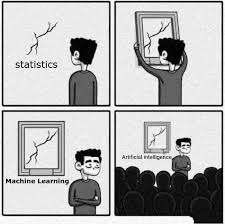


**Fun fact:** The word statistics comes from the modern Latin phrase *statisticum collegium* (lecture about state affairs), which gave rise to the Italian word *statista* (statesman or politician — compare to status) and the German *Statistik* (originally the analysis of data about the state). It acquired the meaning of the collection and classification of data generally in the early 19th century. The collection of data about states and localities continues, largely through national and international statistical services. See [reference](https://math.wikia.org/wiki/Statistics#:~:text=The%20word%20statistics%20comes%20from,of%20data%20about%20the%20state).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Countplots" data-toc-modified-id="Countplots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Countplots</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histograms</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Summarizing-distributions" data-toc-modified-id="Summarizing-distributions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summarizing distributions</a></span><ul class="toc-item"><li><span><a href="#Sample-mean" data-toc-modified-id="Sample-mean-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sample mean</a></span><ul class="toc-item"><li><span><a href="#Trimmed-mean" data-toc-modified-id="Trimmed-mean-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Trimmed mean</a></span></li><li><span><a href="#Median" data-toc-modified-id="Median-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Median</a></span></li><li><span><a href="#Mode" data-toc-modified-id="Mode-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Mode</a></span></li></ul></li><li><span><a href="#Variance-and-standard-deviation" data-toc-modified-id="Variance-and-standard-deviation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Variance and standard deviation</a></span></li><li><span><a href="#Skewness-(assymetry)" data-toc-modified-id="Skewness-(assymetry)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Skewness (assymetry)</a></span></li><li><span><a href="#Other-moments-of-the-distributions" data-toc-modified-id="Other-moments-of-the-distributions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Other moments of the distributions</a></span></li></ul></li><li><span><a href="#Percentiles-and-boxplots" data-toc-modified-id="Percentiles-and-boxplots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Percentiles and boxplots</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Relationships-between-variables" data-toc-modified-id="Relationships-between-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Relationships between variables</a></span><ul class="toc-item"><li><span><a href="#Covariance" data-toc-modified-id="Covariance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Covariance</a></span></li><li><span><a href="#Pearson-Correlation" data-toc-modified-id="Pearson-Correlation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Pearson Correlation</a></span></li><li><span><a href="#Correlation-is-not-causation!!" data-toc-modified-id="Correlation-is-not-causation!!-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Correlation is not causation!!</a></span></li><li><span><a href="#Visualizing-multiple-relationships" data-toc-modified-id="Visualizing-multiple-relationships-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Visualizing multiple relationships</a></span><ul class="toc-item"><li><span><a href="#Pairplot" data-toc-modified-id="Pairplot-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Pairplot</a></span></li><li><span><a href="#Heatmaps" data-toc-modified-id="Heatmaps-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Heatmaps</a></span></li></ul></li></ul></li><li><span><a href="#Beware" data-toc-modified-id="Beware-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Beware</a></span></li><li><span><a href="#References-&amp;-further-materials" data-toc-modified-id="References-&amp;-further-materials-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References &amp; further materials</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Let us welcome SciPy!
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

## Countplots

One way to understand your data is by counting how many times each value appears in your [sample](https://en.wikipedia.org/wiki/Sample_(statistics)#:~:text=In%20statistics%20and%20quantitative%20research,points%2C%20sampling%20units%20or%20observations.).

Notice that the method above is only valid for [discrete variables](http://onlinestatbook.com/glossary/discrete_variables.html)

In [2]:
# experiment: roll a dice 20 times
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=20)

rolls

array([6, 1, 1, 2, 1, 6, 5, 2, 6, 2, 6, 6, 6, 1, 3, 6, 6, 6, 1, 6])

In [3]:
# A built-in alternative
from collections import Counter
Counter(rolls)

Counter({6: 10, 1: 5, 2: 3, 5: 1, 3: 1})

In [4]:
# equiv
counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
for r in rolls:
    counts[r] += 1

# optimize with defaultdice

In [5]:
counts

{1: 5, 2: 3, 3: 1, 4: 0, 5: 1, 6: 10}

In [6]:
set(rolls)

{1, 2, 3, 5, 6}

In [7]:
count_results = {n: list(rolls).count(n) for n in set(rolls)}

count_results

{1: 5, 2: 3, 3: 1, 5: 1, 6: 10}

The above tables are called `frequency tables`. 

And we could plot the result as a bar chart to have a visual representation. 

<AxesSubplot:ylabel='count'>

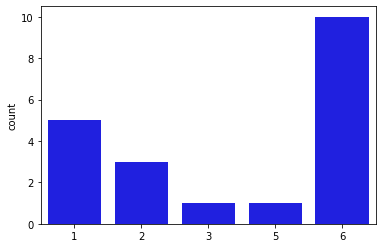

In [8]:
sns.countplot(x=rolls, color='b')

## Histograms

A good visual representation of a [continuous variable](http://onlinestatbook.com/glossary/continuous_variables.html)
 is the [histogram](https://en.wikipedia.org/wiki/Histogram)

In [9]:
# experiment: sample of random values
randn = np.random.randn(200)

In [10]:
randn[:10]

array([ 1.4761036 ,  0.10901286, -1.10787179,  1.2275844 ,  0.35268322,
        0.93314283, -1.71491772,  0.22548401,  0.35678017,  1.36739192])

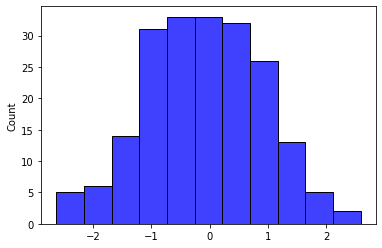

In [11]:
sns.histplot(x=randn, color='b');

### Exercise

Imagine we now have a magical (or spherical) dice which can take any real number from 1 to 6, both included. Create an experiment of rolling that dice 20 times and plot the results using a histogram.

**Hint:** you may want to use the `np.random.uniform` function

In [12]:
import numpy as np

In [13]:
magic_rolls = np.random.uniform(
    low=1,
    high=6,
    size=20
)

magic_rolls

array([2.99481982, 1.6214516 , 1.95941334, 2.61043927, 3.90846474,
       3.27405863, 3.76159977, 1.23358625, 4.39732095, 2.46214632,
       5.81087051, 1.26991538, 3.61685752, 4.24913969, 5.08821333,
       4.0516257 , 5.72252847, 4.34823193, 1.61796787, 3.60794258])

<AxesSubplot:ylabel='Count'>

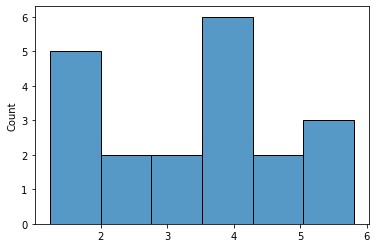

In [14]:
sns.histplot(magic_rolls)

In [15]:
magic_rolls.mean()

3.3803296838782715

## Summarizing distributions

Plotting the histogram of a distribution is always a good idea. It provides a lot of information at a simple glance. However, we sometimes want to summarize our distributions with a set of representative numbers, aka `summary statistics`.

**Note:** We call a `statistic` to any quantity computed from values in a sample that is used for a statistical purpose. See [Wikipedia](https://en.wikipedia.org/wiki/Statistic).

In [16]:
df_titanic = sns.load_dataset('titanic')

In [17]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='age', ylabel='Count'>

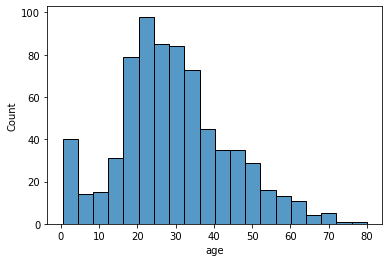

In [18]:
sns.histplot(df_titanic.age)

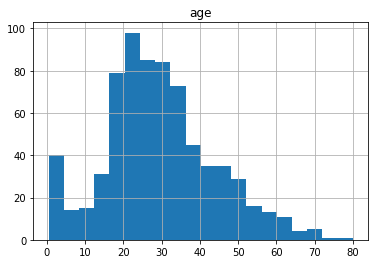

In [19]:
# pandas also has a quick option to plot histograms
df_titanic.hist('age', bins='auto');

### Sample mean

[Wikipedia](https://en.wikipedia.org/wiki/Mean): For a data set, the arithmetic mean, also called the expected value or average, is the central value of a discrete set of numbers: specifically, the sum of the values divided by the number of values.
$$\bar{x} = \frac{\sum x_i}{N} = \frac{x_1 + x_2 + \dots + x_n}{N}$$

**Exercise**

Create your own function to compute the `mean` of a set of numbers and use it to calculate the mean age of the passengers of the Titanic.

In [20]:
# Your code goes here
def mean_of_values(elements):
    return sum(elements) / len(elements)

In [21]:
mean_of_values([3, 4, 5, 20])

8.0

In [22]:
# the result is:
df_titanic.age.mean()

29.69911764705882

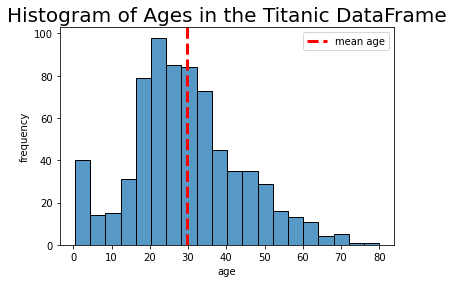

In [23]:
# plot hist
fig, ax = plt.subplots()

sns.histplot(df_titanic.age, bins=20)

# plot the mean
plt.axvline(
    df_titanic.age.mean(),
    c="red",
    linewidth= 3,
    linestyle='--',
    label='mean age'
)

plt.title('Histogram of Ages in the Titanic DataFrame', size=20)
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend()
plt.show()

The mean is by far the most commonly used `centrality measure` to summarize a distribution. However it has a main drawback it is very sensitive to extreme observations (aka `outliers`). 

Let us analyze the [distribution of salaries](https://www.bankinter.com/blog/economia/salario-medio-espanol) in Spain to illustrate this. According to the source, the mean salary is about 23.646,50 Euros. We could think that the salaries are distributed something like this:

In [24]:
sample_mean = 23646.50
sample_std = 5000
population = 10000
mock_salaries = np.random.normal(sample_mean, sample_std, population)

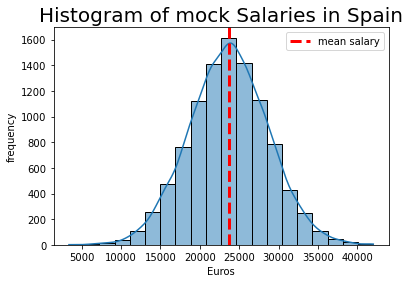

In [25]:
fig, ax = plt.subplots()

sns.histplot(mock_salaries, bins=20, kde=True)

plt.axvline(
    np.mean(mock_salaries),
    c="red",
    linewidth= 3.,
    linestyle='--',
    label='mean salary'
)

plt.title('Histogram of mock Salaries in Spain', size=20)
plt.xlabel('Euros')
plt.ylabel('frequency')
plt.legend()
plt.show()

**Exercise**

Calculate the total amount of money spent in salaries according to the previous distribution.

In [26]:
# Your code goes here
population = 10000
mean_salary = 23000

In [27]:
population * mean_salary

230000000

$$N * \bar{x} = x_1 + x_2 + \dots + x_n$$

OK, but what about people like Messi?? According to [this piece of news](https://www.lavanguardia.com/deportes/fc-barcelona/20190611/462809307977/messi-mejor-pagado-forbes-cristiano-neymar-2019.html), in 2019 he earned about 112 Million Euros. 

In [28]:
salary_messi = 112e6
mock_salaries_with_messi = np.append(mock_salaries, salary_messi)

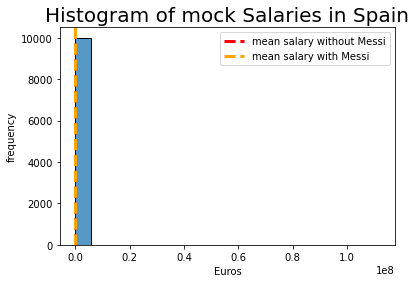

In [29]:
sns.histplot(mock_salaries, bins=20)

# plot the mean
plt.axvline(
    np.mean(mock_salaries),
    c="red",
    linewidth= 3,
    linestyle='--',
    label='mean salary without Messi'
)


sns.histplot(mock_salaries_with_messi, bins=20)

# plot the mean
plt.axvline(
    np.mean(mock_salaries_with_messi),
    c="orange",
    linewidth= 3.,
    linestyle='--',
    label='mean salary with Messi'
)

plt.title('Histogram of mock Salaries in Spain', size=20)
plt.xlabel('Euros')
plt.ylabel('frequency')
plt.legend()
plt.show()

We can see nothing, lets change X axes limits

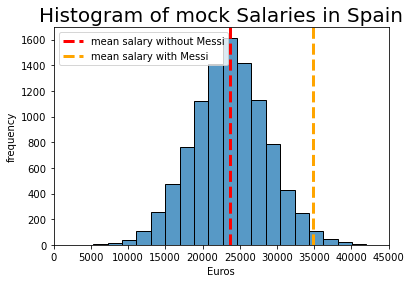

In [30]:
sns.histplot(mock_salaries, bins=20)

plt.axvline(
    np.mean(mock_salaries),
    c="red",
    linewidth= 3.,
    linestyle='--',
    label='mean salary without Messi'
)

#plt.hist(mock_salaries_with_messi, bins=20)

plt.axvline(
    np.mean(mock_salaries_with_messi),
    c="orange",
    linewidth= 3.,
    linestyle='--',
    label='mean salary with Messi'
)


plt.xlim(0, 45000)
plt.title('Histogram of mock Salaries in Spain', size=20)
plt.xlabel('Euros')
plt.ylabel('frequency')
plt.legend()
plt.show()

🤔

In [31]:
print(f'Mean Salary of Spain without Messi: {np.round(np.mean(mock_salaries), 2)}')
print(f'Mean Salary of Spain with Messi: {np.round(np.mean(mock_salaries_with_messi), 2)}')

Mean Salary of Spain without Messi: 23667.39
Mean Salary of Spain with Messi: 34863.9


This new mean does not look very representative of the population, does it? Hopefully, we have a couple of options for better statistics in this scenario.

#### Trimmed mean

[Wikipedia:](https://en.wikipedia.org/wiki/Truncated_mean) A truncated mean or trimmed mean is a statistical measure of central tendency, much like the mean and median. It involves the calculation of the mean after discarding given parts of a probability distribution or sample at the high and low end, and typically discarding an equal amount of both.

In [32]:
trim_mean?

In [33]:
# function imported from scipy.stats
print(f'Mean trimmed Salary of Spain without Messi: {np.round(trim_mean(mock_salaries, 0.05), 2)}')
print(f'Mean trimmed Salary of Spain with Messi: {np.round(trim_mean(mock_salaries_with_messi, 0.05), 2)}')

Mean trimmed Salary of Spain without Messi: 23660.95
Mean trimmed Salary of Spain with Messi: 23661.87


#### Median

[Wikipedia](https://en.wikipedia.org/wiki/Median): In statistics and probability theory, a median is a value separating the higher half from the lower half of a data sample, a population or a probability distribution. For a data set, it may be thought of as "the middle" value. The basic advantage of the median in describing data compared to the mean (often simply described as the "average") is that it is not skewed so much by a small proportion of extremely large or small values, and so it may give a better idea of a "typical" value. 

In [34]:
print(f'Median Salary of Spain without Messi: {np.round(np.median(mock_salaries), 2)}')
print(f'Median Salary of Spain with Messi: {np.round(np.median(mock_salaries_with_messi), 2)}')

Median Salary of Spain without Messi: 23691.96
Median Salary of Spain with Messi: 23692.46


#### Mode

[Wikipedia:](https://en.wikipedia.org/wiki/Mode_(statistics)) The mode is the value that appears most often in a set of data values. Distributions may have more than one mode (or local maxima). Such distributions are called *multimodal*. 

For the case of discrete (or *quasi* discrete) variables this is a rater easy quantity to calculate:

<AxesSubplot:xlabel='age', ylabel='Count'>

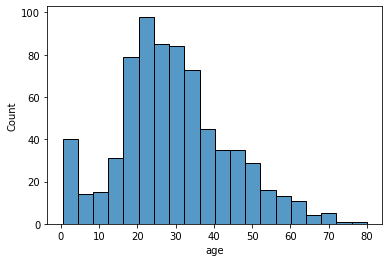

In [35]:
sns.histplot(df_titanic.age)

In [36]:
df_titanic.age.mode()

0    24.0
dtype: float64

But, when the variable is continous chances are you don´t even have repeated values!!

In that case you should fit your data to a known distribution (or to an estimate) and calculate the max of the pdf (see an [example](https://stackoverflow.com/questions/59662920/how-to-get-the-mode-of-distribution-in-scipy-stats)). 

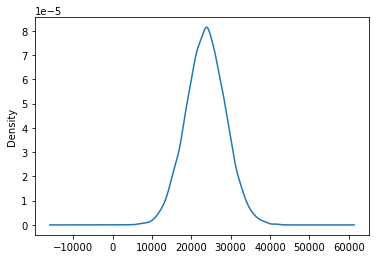

In [37]:
pd.Series(mock_salaries).plot.kde();
#pd.Series(mock_salaries_with_messi).plot.kde();

In [38]:
# functions from scipy.stats

In [39]:
# build a gaussian kernel adapted to data
kernel = gaussian_kde(mock_salaries)
# calculate its height in every point
height = kernel.pdf(mock_salaries)
# calculate the X value of maximum height
mode_value = mock_salaries[np.argmax(height)]

print('Mode without Messi: ', mode_value)

Mode without Messi:  23880.34133505347


### Variance and standard deviation

Other than knowing where a distribution is *centered* it is also important to know how *variable* the data is, that is, how *disperse* it is. Two statistics come in handy here, the Variance and the Standard deviation:

$$Var = \sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu) ^ 2}{N}$$ 

$$Std = \sigma = \sqrt{Var}$$

From [Wikipedia:](https://en.wikipedia.org/wiki/Variance) In probability theory and statistics, variance is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of numbers is spread out from their average value. 

(**Note**: The above expressions refer to the Variance of a entire population, where $\mu$ is the population mean. When we estimate the Variance or the std from a sample, the correct, *unbiased* formula is:
$$\hat{Var} = \hat\sigma^2 =\frac{\sum (x_i - \bar{x}) ^ 2}{N-1}$$ 


Lets plot two sets of numbers with same mean, different variance

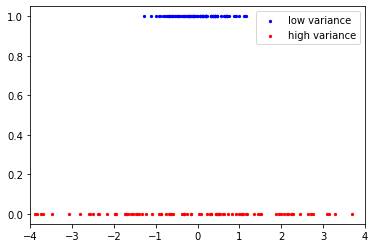

In [40]:
# number of points
N = 100

# std=0.5
plt.scatter(
    x=np.random.normal(loc=0, scale=0.5, size=N), 
    y=np.ones(N),
    c='b',
    s=5,
    label='low variance'
)

# std=2
plt.scatter(
    x=np.random.normal(0, 2, N), 
    y=np.zeros(N),
    c='red',
    s=5,
    label='high variance'
)

plt.xlim([-4, 4])
plt.legend()
plt.show()

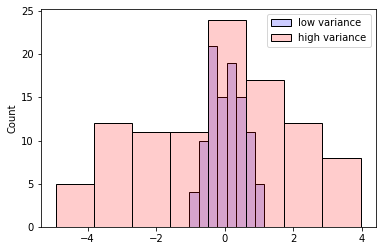

In [41]:
sns.histplot(
    np.random.normal(0, 0.5, N), 
    color='b',
    label='low variance',
    alpha=0.2
)

sns.histplot(
    np.random.normal(0, 2, N), 
    color='red',
    label='high variance',
    alpha=0.2
)

plt.legend()
plt.show()

Notice that the Variance and the standard deviations are also very sensitive to outliers:

In [42]:
print(f'Std of salaries in Spain without Messi: {np.round(np.std(mock_salaries), 2)}')
print(f'Std of salaries in Spain with Messi: {np.round(np.std(mock_salaries_with_messi), 2)}')

Std of salaries in Spain without Messi: 5015.79
Std of salaries in Spain with Messi: 1119662.59


Calculate std of this series of data: \[6, 12, 15, 20, 23\]

In [43]:
from sklearn.metrics import mean_absolute_error

**Exercise** 

The Var or *mean quadratic variation* is used for convinience--- see this [statsexchange thread](https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia). However, we could also define other measures of dispersion such as the *mean absolute deviation*:

$$MAD = \frac{\sum \lvert (x_i - \bar{x}) \rvert}{N}$$

Implement your own function to compute MAE and apply it to the salaries mock data. Which one is more sensitive to outliers and why?

In [44]:
def mae(numbers):
    mean = numbers.mean()
    deviations = np.abs(numbers - mean)
    
    return sum(deviations) / (len(numbers))

MSE penalizes values that are away from the mean more than MAE

### Skewness (assymetry)

[Wikipedia](https://en.wikipedia.org/wiki/Skewness) In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

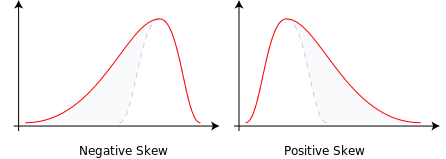

The relative position of the `mean`, `median`, and `mode` of distribution gives us an idea of the `skewness` of our data

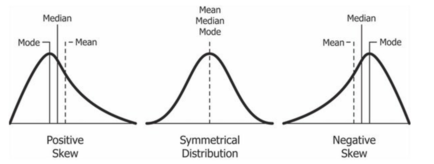

The sample skewness is normally computed as the Fisher-Pearson coefficient of skewness. This is the case with the `skew` function from SciPy stats.

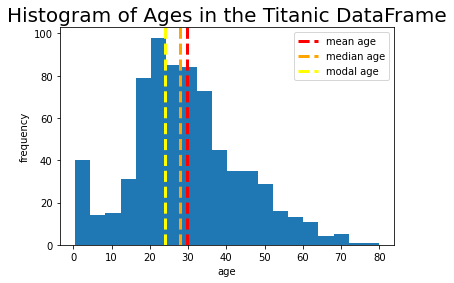

In [45]:
# back to the Titanic data
plt.hist(df_titanic.age, bins=20)
plt.axvline(df_titanic.age.mean(),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean age') # plot the mean

plt.axvline(df_titanic.age.median(),
            c="orange",
            linewidth= 3.,
            linestyle='--',
            label='median age') # plot the median

plt.axvline(df_titanic.age.mode()[0],
            c="yellow",
            linewidth= 3.,
            linestyle='--',
            label='modal age') # plot the mode

plt.title('Histogram of Ages in the Titanic DataFrame', size=20)
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend()
plt.show()

**Question:** What is going to be the sign of the Fisher-Pearson coefficient of skewness for the distribution of ages in the Titanic dataset??

In [46]:
# Uncomment to get the answer
skew(df_titanic.age.dropna())

0.3882898514698657

In [47]:
skew(mock_salaries)

0.012055870574041803

In [48]:
skew(mock_salaries_with_messi)

99.98698981687673

In [49]:
ns = np.array(list(range(90, 111)) + [150])

In [50]:
ns

array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 150])

In [51]:
ns.mean()

102.27272727272727

In [52]:
ns.std()

11.977941157818622

In [53]:
skew(ns)

2.7302295857553607

In [54]:
ns = np.array(list(range(90, 111)) + [1000])

In [55]:
ns

array([  90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
        101,  102,  103,  104,  105,  106,  107,  108,  109,  110, 1000])

In [56]:
ns.mean()

140.9090909090909

In [57]:
ns.std()

187.56233123730777

In [58]:
skew(ns)

4.357195328113545

### Other moments of the distributions

The mean, variance, and skewness of a distribution are also known as the first, second, and third *[moments](https://en.wikipedia.org/wiki/Central_moment)* respectively. There are higher order ones, such the fourth: the *kurtosis*. 

They all give us information about the shape of the distribution. You can watch [this video](https://www.youtube.com/watch?v=ISaVvSO_3Sg) if you feel more curious about moment.

## Percentiles and boxplots

Percentiles (or quantiles) are another useful statistic to understand distributions. According to [Wikipedia](https://en.wikipedia.org/wiki/Percentile):

"A percentile (or a centile) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations falls. For example, the 20th percentile is the value (or score) below which 20% of the observations may be found. Equivalently, 80% of the observations are found above the 20th percentile."

Pandas has the `quantile` method for DataFrame and Series.

See [link](http://web.pdx.edu/~stipakb/download/PA551/boxplot.html) for details and examples.

**Exercise (conceptual):** Can you tell what is the relationship between the median and the percentiles of a distribution?

Solution: median is percentile 50

**Exercise** Find the age in the titanic dataset such that 90% of the passengers were older than that.

In [59]:
# Your code goes here
df_titanic.age.quantile(0.1)

14.0

In [60]:
# Your code goes here
df_titanic.age.quantile(0.5)

28.0

In [61]:
# Your code goes here
df_titanic.age.quantile(0.75)

38.0

In [62]:
df_titanic.age.quantile(np.arange(0, 1.1, 0.1))

0.0     0.42
0.1    14.00
0.2    19.00
0.3    22.00
0.4    25.00
0.5    28.00
0.6    31.80
0.7    36.00
0.8    41.00
0.9    50.00
1.0    80.00
Name: age, dtype: float64

In [63]:
np.arange(0, 1.25, 0.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [64]:
df_titanic.age.quantile(0.99)

65.87

An useful representation of a distribution making use of the percentiles is the so-called `box-plot`.

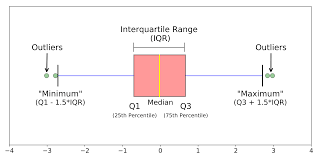

In [65]:
df_titanic.age.quantile(np.arange(0, 1.25, 0.25))

0.00     0.420
0.25    20.125
0.50    28.000
0.75    38.000
1.00    80.000
Name: age, dtype: float64

In [66]:
IQR = 38 - 20.125
IQR

17.875

In [67]:
1.5 * IQR

26.8125

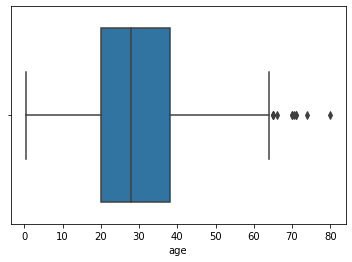

In [68]:
sns.boxplot(x="age", data=df_titanic)
plt.show()

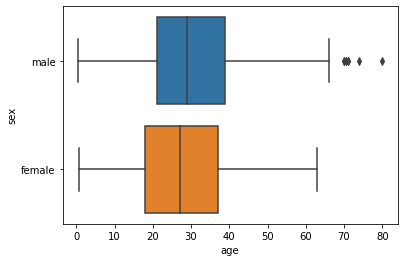

In [69]:
# Boxplots are very useful to compare distributions
sns.boxplot(x="age",  
            data=df_titanic, 
            y='sex')
plt.show()
# see also violinplot

### Outliers

Boxplots normally depict outliers as the data points outside the range:

$$\big[ Q_1 - 1.5 * (Q_3 - Q_1 ), Q_3 + 1.5 * (Q_3 - Q_1 ) \big]$$


The value $(Q_3 - Q_1 ) := IQR$ is known as the `interquartile range`. 

**Note:** There are other ways to flag observations as outliers, and the value $1.5$ can be changed to any non-negative $k$.

## Relationships between variables

The first approach to understand the relationship between two variables is to plot a scatter plot of one against the other.

In [70]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

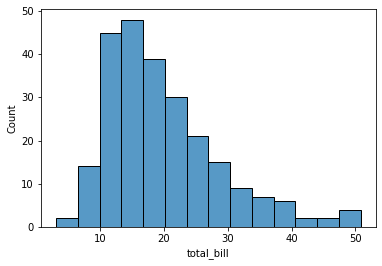

In [71]:
sns.histplot(tips.total_bill)

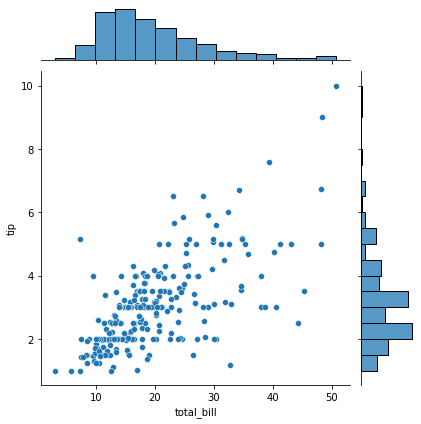

In [72]:
sns.jointplot(
    data=tips, 
    x="total_bill", 
    y="tip"
);

There seems to be a clear pattern: The larger the bill, the larger the tip. Shall we quantify this relationship?

### Covariance

[Wikipedia:](https://en.wikipedia.org/wiki/Covariance)

In probability theory and statistics, covariance is a measure of the joint variability of two random variables.[1] If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.[2] In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. **The sign of the covariance therefore shows the tendency in the linear relationship between the variables**. 
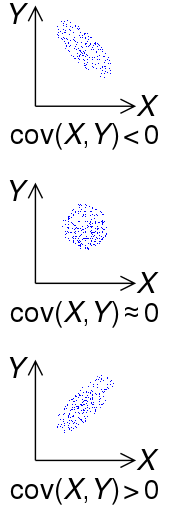



The formula for the covariance between two varaibles ($j$, and $k$) is similar to that of the variance:

$$q_{jk}=\frac{1}{N-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right)$$

**Note:** can you see that if $j=k$ the covariance is just the variance? 

**Exercise:** Search the web and find a `python` way to calculate the covariance of the variables `total_bill` and `tip`.

In [73]:
tips[["total_bill", "tip"]].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [74]:
# Your code goes here
tips[['total_bill', 'tip']].cov()

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


In [75]:
tips[['total_bill', 'tip']].var()

total_bill    79.252939
tip            1.914455
dtype: float64

**Exercise:** Search the web and find a `python` way to calculate the covariance of the variables `total_bill` and `tip`**Exercise:** Multiply both columns by 10. How does this affect the covariance?

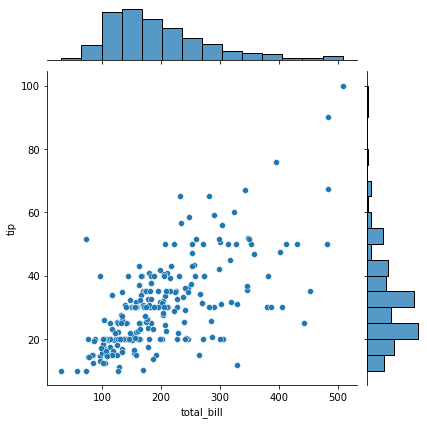

In [76]:
sns.jointplot(
    x=tips.total_bill * 10, 
    y=tips.tip * 10
);

In [77]:
# Your code goes here
(10 * tips[['total_bill', 'tip']]).cov()

,total_bill,tip
total_bill,7925.293861,832.350163
tip,832.350163,191.445464


### Pearson Correlation

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the Pearson´s correlation coefficient, however, shows by its magnitude the strength of the linear relation. The formula is

$$\rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$


where $\sigma_X$ and $\sigma_Y$ are the respective standard deviations.

The Pearson´s correlation coefficient is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.


**Beware!** The fact that the correlation (or Covariance) is zero does not mean that there are no patterns!

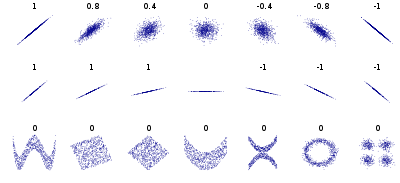

In [78]:
# Your code goes here
(tips[['total_bill', 'tip']]).corr(method='pearson')

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


Multiply both columns by 10. How does this affect the correlation?

In [79]:
# Your code goes here
(10*tips[['total_bill', 'tip']]).corr(method='pearson')

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


### Correlation is not causation!!

There are plenty of funny examples around this idea. See for example [this video](https://www.youtube.com/watch?v=8B271L3NtAw). To understand the difference between correlation and causation it is an essential skill for any data analyst!!

[Spurious correlations](https://www.tylervigen.com/spurious-correlations)

### Visualizing multiple relationships

#### Pairplot

In [80]:
iris = sns.load_dataset('iris')

In [81]:
iris.shape

(150, 5)

In [82]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [83]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


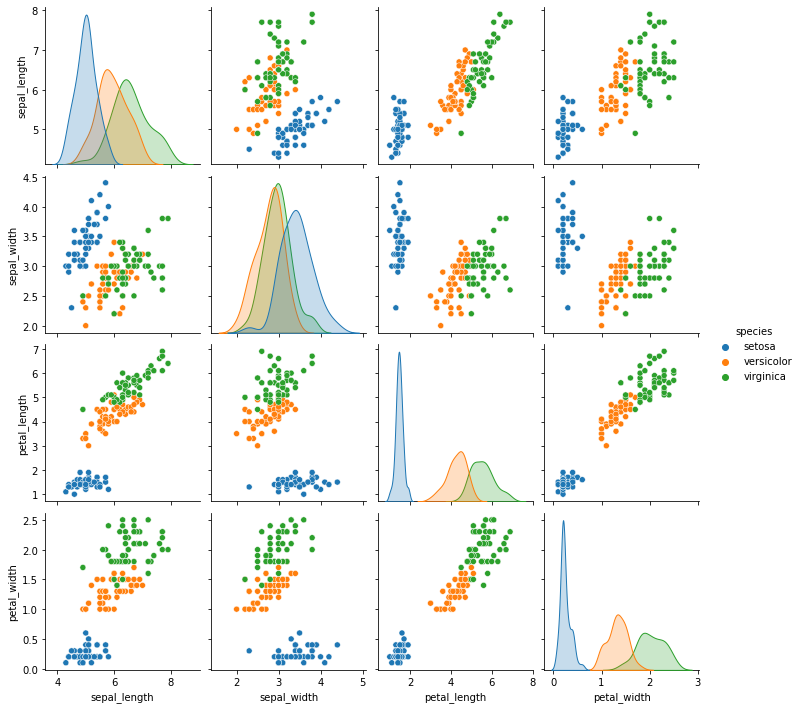

In [84]:
sns.pairplot(iris, hue='species');

#### Heatmaps

In [85]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


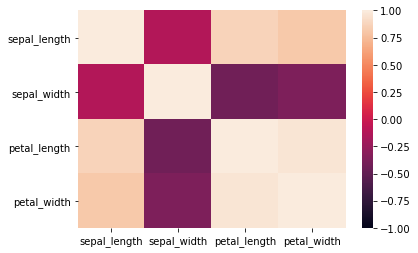

In [86]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1);

## Beware

Summarizing populations in a few numbers (statistics), is powerful, but some information is lost:     
these numbers (mean, median, std, quantiles...) do not characterize our distribution!!: [Ascombe quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

## References & further materials


* [Think Stats](https://greenteapress.com/wp/think-stats-2e/)
* [Practical Statistics for Data Scientists](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/)

Understanding causation is a much more complicated issue. A few ways to try and do so are:

* [Randomized controlled trials](http://wikipedia.org/wiki/Randomized_controlled_trial)
* [Natural experiments](http://wikipedia.org/wiki/Natural_experiment)